## 유용한 명령어
- shift + tap : 변수가 저장하는 내용을 볼 수 있다.
- m : markdown
- a, b : 현재 셀 위, 아래에 셀 추가.
- d + d : 셀 삭제

# 2. Markdown + 매직 명령어

# 이것은 표제이다.

이것은 단락이다.

- 조항 쓰기도
- 이렇게 표현할 수 있다.

테이블도 기술할 수 있따.

Package | version
--------|--------
pandas | 0.19.2
matplotlib | 2.0.0

## 수식표시

이 코드 셀에는 다음과 같이 서식을 표현할 수 있다.

\begin{align}
\sqrt{2x-1}+(3+x)^3
\end{align}

$$ E = mc^2 $$

인라인에서도 오른쪽에 쓰여진 것처럼 $\sqrt{a^2+b^2}$ 기술할 수 있다.

## 콘솔창 사용

In [1]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8C2C-D353

 C:\Users\time8\Desktop\program\2018.11\jupyter\jupyterNote 디렉터리

2018-11-09  오전 07:44    <DIR>          .
2018-11-09  오전 07:44    <DIR>          ..
2018-11-08  오후 09:27                66 .gitattributes
2018-11-09  오전 07:24    <DIR>          .ipynb_checkpoints
2018-11-09  오전 12:21            10,053 day1.ipynb
2018-11-09  오전 07:44             1,376 day2.ipynb
2018-11-09  오전 12:11            32,881 matplotlibrc
               4개 파일              44,376 바이트
               3개 디렉터리  344,363,737,088 바이트 남음


##매직 명령어
 - %time 시간측정
 - %%timeit 셀 전체 시작 측정 + 요약
 - %matplotlib inline 코드 셀 바로 아래에서 그래프 출력
 - %matplotlib notebook 코드 셀 아래 + 동적으로 조작 가능

In [2]:
%time sum(range(10000))

Wall time: 0 ns


49995000

In [3]:
%%timeit -n 1000 -r 3
for i in range(1000):
    i*2

48.9 µs ± 1.9 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


# 3장 Pandas로 데이터 처리하기

In [8]:
import os
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_csv = os.path.join(base_url, 'anime.csv')

print(anime_csv)

https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/anime.csv


In [9]:
pd.read_csv(anime_csv).head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
ser = pd.Series([1,2,3], index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [12]:
ser.loc[['a', 'c']]

a    1
c    3
dtype: int64

In [13]:
df = pd.DataFrame(
[[1, 10, 100], [2, 20, 200], [3, 30, 300]],
index=['r1', 'r2', 'r3'],
columns=['c1', 'c2', 'c3'])
df

,c1,c2,c3
r1,1,10,100
r2,2,20,200
r3,3,30,300


In [16]:
df.loc[df['c2'] > 10]

,c1,c2,c3
r2,2,20,200
r3,3,30,300


In [17]:
import os
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_csv = os.path.join(base_url, 'anime.csv')

df = pd.read_csv(anime_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [18]:
#인덱스로 할 열을 열 이름으로 지정
df = pd.read_csv(anime_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [19]:
# 지정한 열을 지정한 형으로 불러오기
df = pd.read_csv(anime_csv, dtype={'members':float})
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266.0


In [21]:
#datetime 형의 열이 포함되어 있는 경우
anime_stock_price_csv = os.path.join(base_url, 'anime_stock_price.csv')
df = pd.read_csv(anime_stock_price_csv, parse_dates=['Date'])
df.dtypes

Date              datetime64[ns]
TOEI ANIMATION           float64
IG Port                  float64
dtype: object

In [23]:
#html 파일 불러오기
url = 'https://docs.python.org/3/py-modindex.html'

tables = pd.read_html(url, index_col=1)
tables[0].iloc[:, 1:].dropna().head(10)

,2
1,
__future__,Future statement definitions
__main__,The environment where the top-level script is ...
_dummy_thread,Drop-in replacement for the _thread module.
_thread,Low-level threading API.
abc,Abstract base classes according to PEP 3119.
aifc,Read and write audio files in AIFF or AIFC for...
argparse,Command-line option and argument parsing library.
array,Space efficient arrays of uniformly typed nume...
ast,Abstract Syntax Tree classes and manipulation.


In [26]:
#논리값으로 데이터 추출하기
import os
import pandas as pd
import numpy as np

df = pd.read_csv(anime_csv)
df.loc[df['episodes'] == 'Unknown'].head()

,anime_id,name,genre,type,episodes,rating,members
73,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
248,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
607,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
993,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
1226,21639,Yu☆Gi☆Oh! Arc-V,"Action, Fantasy, Game, Shounen",TV,Unknown,7.61,17571


In [28]:
df.loc[df['episodes'] == 'Unknown', 'episodes'] = np.nan

In [29]:
# 결손값 제외하기
df.loc[df['episodes'].isnull()].head()

,anime_id,name,genre,type,episodes,rating,members
73,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,NaN,8.58,504862
248,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,NaN,8.25,114702
607,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,NaN,7.94,533578
993,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,NaN,7.72,5400
1226,21639,Yu☆Gi☆Oh! Arc-V,"Action, Fantasy, Game, Shounen",TV,NaN,7.61,17571


In [30]:
# 비파괴적인 확인.
df.dropna().loc[70:].head()

,anime_id,name,genre,type,episodes,rating,members
70,578,Hotaru no Haka,"Drama, Historical",Movie,1,8.58,174878
71,16894,Kuroko no Basket 2nd Season,"Comedy, School, Shounen, Sports",TV,25,8.58,243325
72,5028,Major S5,"Comedy, Drama, Romance, Sports",TV,25,8.58,28653
74,801,Ghost in the Shell: Stand Alone Complex 2nd GIG,"Action, Mecha, Military, Mystery, Police, Sci-...",TV,26,8.57,113993
75,31933,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,39,8.57,74074


In [33]:
#DataFrame 내용을 파괴적으로 다시 쓰는 경우
df.dropna(inplace=True)
df.loc[70:].head()

,anime_id,name,genre,type,episodes,rating,members
70,578,Hotaru no Haka,"Drama, Historical",Movie,1,8.58,174878
71,16894,Kuroko no Basket 2nd Season,"Comedy, School, Shounen, Sports",TV,25,8.58,243325
72,5028,Major S5,"Comedy, Drama, Romance, Sports",TV,25,8.58,28653
74,801,Ghost in the Shell: Stand Alone Complex 2nd GIG,"Action, Mecha, Military, Mystery, Police, Sci-...",TV,26,8.57,113993
75,31933,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,39,8.57,74074


In [40]:
# 데이터 형
df['anime_id'].dtype
df.dtypes
df['episodes'].astype(np.int64)
df.astype({'episodes':np.int64, 'rating':np.float64}).head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [39]:
# 정렬하기(비파괴적인 조작)
df.sort_values('rating', ascending=False).head()

,anime_id,name,genre,type,episodes,rating,members
9846,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
8985,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8474,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


### 함수 적용하기

메서드 | 통용대상 | 돌아오는 값
--------|------|--------
map|Series|Series
apply|DataFrame|Series
applymap|DataFrame|DataFrame

In [41]:
import html

print(df['name'].head())
print(df['name'].map(html.unescape).head()) # 특수문자 변경

0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                       Gintama&#039;
Name: name, dtype: object
0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                            Gintama'
Name: name, dtype: object


In [43]:
df.apply(len) # 열에 적용 -> 행의 크기 반환
df.apply(len, axis=1).head() # 행에 적용 -> 열의 크기 반환

0    7
1    7
2    7
3    7
4    7
dtype: int64

In [44]:
# 각 셀에 대해 적용.
df[['name', 'genre']].applymap(len).head() 

,name,genre
0,14,36
1,32,59
2,8,60
3,11,16
4,13,60


### 통계량 산출

In [45]:
df.mean()

anime_id    14054.666534
rating          6.508161
members     18934.385867
dtype: float64

In [46]:
df['members'].sum()

190782872

In [47]:
df.describe().round(1)

,anime_id,rating,members
count,10076.0,10076.0,10076.0
mean,14054.7,6.5,18934.4
std,11295.2,1.1,57122.5
min,1.0,1.7,12.0
25%,3429.8,5.9,177.0
50%,10525.5,6.6,1227.0
75%,24437.5,7.3,10263.2
max,34519.0,10.0,1013917.0


In [48]:
# 백분위수 수정
df.describe(percentiles=[0.1, 0.9]).round(1)

,anime_id,rating,members
count,10076.0,10076.0,10076.0
mean,14054.7,6.5,18934.4
std,11295.2,1.1,57122.5
min,1.0,1.7,12.0
10%,1258.5,5.1,74.0
50%,10525.5,6.6,1227.0
90%,31188.5,7.8,47603.5
max,34519.0,10.0,1013917.0


### 크로스 집계

In [50]:
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
df = pd.read_csv(anime_master_csv)

grouped = df.groupby('type')
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [51]:
grouped.mean().round(1)

,anime_id,episodes,rating,members
type,,,,
Movie,14322.5,1.1,6.3,10654.0
Music,22495.1,1.1,5.6,1273.0
ONA,22738.0,6.8,5.6,4401.8
OVA,12207.7,2.5,6.5,6849.5
Special,16802.3,2.5,6.5,7424.6
TV,10929.6,37.5,6.9,41832.3


In [52]:
grouped.describe().round(1).head(16)

anime_id  episodes   members  rating
type                                             
Movie count    2220.0    2220.0    2220.0  2220.0
      mean    14322.5       1.1   10654.0     6.3
      std     10925.7       2.2   31603.6     1.2
      min         5.0       1.0      13.0     2.5
      25%      4396.8       1.0     119.0     5.4
      50%     10677.5       1.0     489.5     6.5
      75%     24071.5       1.0    4239.0     7.3
      max     34201.0     100.0  466254.0    10.0
Music count     485.0     485.0     485.0   485.0
      mean    22495.1       1.1    1273.0     5.6
      std     10175.0       1.3    4489.0     1.0
      min       731.0       1.0      24.0     3.3
      25%     12101.0       1.0      97.0     5.0
      50%     24903.0       1.0     226.0     5.6
      75%     31925.0       1.0     797.0     6.2
      max     34412.0      24.0   71136.0     8.4

In [53]:
df.groupby(['type', 'episodes']).mean().round(1).head(20)

anime_id  rating  members
type  episodes                           
Movie 1          14320.0     6.3  10588.6
      2          13802.0     6.9   6638.9
      3          11339.3     6.7  53598.1
      4          15723.5     7.3   3566.5
      5          12558.3     6.1   3641.0
      6           8433.5     6.0    178.5
      7          13602.5     6.9  11989.5
      9           8928.0     6.2    267.0
      10         31020.0     6.9     57.0
      12         20908.0     5.4    790.7
      14         13817.0     6.0    137.0
      100        29924.0     7.0     56.0
Music 1          22576.2     5.6   1200.0
      2          28390.8     6.0    404.8
      4           1998.0     6.7   6650.0
      5          14359.0     6.2   1582.0
      7           8348.0     7.1  13361.0
      8           4705.0     7.3  22213.0
      14          5016.0     6.7   2240.0
      24         32633.0     7.6    560.0

In [54]:
df.pivot_table(index='type', aggfunc=np.mean)

,anime_id,episodes,members,rating
type,,,,
Movie,14322.477928,1.100901,10654.022072,6.328599
Music,22495.111340,1.125773,1273.028866,5.583918
ONA,22738.000000,6.778342,4401.822335,5.629628
OVA,12207.692547,2.549689,6849.526398,6.475217
Special,16802.341463,2.495715,7424.628873,6.525577
TV,10929.554655,37.456156,41832.314414,6.928961


In [56]:
df.pivot_table(index=['type', 'episodes'], aggfunc=np.mean).head(20)

anime_id       members    rating
type  episodes                                      
Movie 1         14320.010507  10588.556418  6.325464
      2         13802.000000   6638.875000  6.930000
      3         11339.285714  53598.142857  6.661429
      4         15723.500000   3566.500000  7.260000
      5         12558.333333   3641.000000  6.063333
      6          8433.500000    178.500000  5.980000
      7         13602.500000  11989.500000  6.940000
      9          8928.000000    267.000000  6.220000
      10        31020.000000     57.000000  6.860000
      12        20908.000000    790.666667  5.450000
      14        13817.000000    137.000000  6.000000
      100       29924.000000     56.000000  7.000000
Music 1         22576.194093   1199.976793  5.562089
      2         28390.800000    404.800000  6.020000
      4          1998.000000   6650.000000  6.740000
      5         14359.000000   1582.000000  6.190000
      7          8348.000000  13361.000000  7.090000
      8          4705.000000  22213.000000  7.270000
      14         5016.000000   2240.000000  6.740000
      24        32633.000000    560.000000  7.640000

In [57]:
genres = df['genre'].map(lambda x: x.split(','))
ser = pd.Series(np.hstack(genres.values)) # 다차원을 평탄화
unique_genres = ser.str.strip().unique() # string 데이터 형으로 변경한 후에 문자열 처리
unique_genres.sort() # 사전 순으로
unique_genres

array(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military',
       'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance',
       'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai',
       'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports',
       'Super Power', 'Supernatural', 'Thriller', 'Vampire'], dtype=object)

In [65]:
def filter_df_by_genre(df, genre):
    # 매개변수로 주어진 df를 변경하지 않기 위해서 복사
    genre_df= df.loc[df['genre'].map(lambda x : genre in x)].copy()
    genre_df['genre'] = genre
    return genre_df

genre_df_list = [filter_df_by_genre(df, genre) for genre in unique_genres]
df2 = pd.concat(genre_df_list) # DataFrame들을 병합
df2.sort_values('name', inplace=True)

top10 = df2.groupby('genre')['members'].sum().sort_values(ascending=False).index[:10]

df2 = df2[df2['genre'].isin(top10)]
df2.loc[df2['name'] == 'Kimi no Na wa.']

Index(['Comedy', 'Action', 'Drama', 'Romance', 'Supernatural', 'Fantasy',
       'Shounen', 'School', 'Adventure', 'Sci-Fi'],
      dtype='object', name='genre')

In [62]:
df2.pivot_table(index='genre', columns='type',
               values=['members'], aggfunc=np.sum).head()

members                                                       
type            Movie     Music        ONA        OVA    Special          TV
genre                                                                       
Action     10224960.0   77054.0   524907.0  5793680.0  3412689.0  63364032.0
Adventure   9485223.0   42829.0    70431.0  2373765.0  2052024.0  27529975.0
Comedy      7293127.0   20860.0  1477266.0  5614758.0  6659293.0  65420862.0
Drama       9034099.0  100734.0   188427.0  3043374.0  1915578.0  41011557.0
Fantasy     8019406.0   43962.0   188937.0  2754224.0  2504131.0  34932563.0

### 시계열 데이터 처리

In [69]:
import os
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_stock_price_csv = os.path.join(base_url, "anime_stock_price.csv")
df = pd.read_csv(anime_stock_price_csv, index_col=0, parse_dates=['Date'])
df.head()


,TOEI ANIMATION,IG Port
Date,,
2015-01-01,3356.86,1201.51
2015-01-02,3356.86,1201.51
2015-01-05,3396.12,1218.44
2015-01-06,3361.77,1201.51
2015-01-07,3297.97,1202.51


In [71]:
# 하나 전 값의 변화율을 산출
pct_change = df['TOEI ANIMATION'].pct_change()
pct_change.head()

Date
2015-01-01         NaN
2015-01-02    0.000000
2015-01-05    0.011695
2015-01-06   -0.010114
2015-01-07   -0.018978
Name: TOEI ANIMATION, dtype: float64

In [74]:
# 누적 리턴
cumulative_returns = (pct_change + 1).cumprod()
cumulative_returns[0] = 1
cumulative_returns.head()

Date
2015-01-01    1.000000
2015-01-02    1.000000
2015-01-05    1.011695
2015-01-06    1.001463
2015-01-07    0.982457
Name: TOEI ANIMATION, dtype: float64

In [76]:
# 이동 평균
df['TOEI ANIMATION'].rolling(5).mean().head(10)

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07    3353.916
2015-01-08    3365.694
2015-01-09    3397.102
2015-01-12    3420.658
2015-01-13    3435.380
2015-01-14    3494.272
Name: TOEI ANIMATION, dtype: float64

In [77]:
# 20일 간의 변동성
def historical_volatility(x):
    logreturns = np.diff(np.log(x))
    return np.sqrt(365 * logreturns.var())

df['TOEI ANIMATION'].rolling(20).apply(historical_volatility).head(40)

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15         NaN
2015-01-16         NaN
2015-01-19         NaN
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
2015-01-27         NaN
2015-01-28    0.389024
2015-01-29    0.392433
2015-01-30    0.392591
2015-02-02    0.704471
2015-02-03    0.710922
2015-02-04    0.698907
2015-02-05    0.689205
2015-02-06    0.689185
2015-02-09    0.682390
2015-02-10    0.656230
2015-02-11    0.639411
2015-02-12    0.610269
2015-02-13    0.630817
2015-02-16    0.630314
2015-02-17    0.636288
2015-02-18    0.647457
2015-02-19    0.644487
2015-02-20    0.647373
2015-02-23    0.644805
2015-02-24    0.644997
2015-02-25    0.636671
Name: TOEI ANIMATION, dtype: float64

### DatetimeIndex


In [78]:
#2017/01부터 2017/02까지 한 시간 간격
ix = pd.date_range('2017-01', '2017-02', freq='1H')
ix

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-31 15:00:00', '2017-01-31 16:00:00',
               '2017-01-31 17:00:00', '2017-01-31 18:00:00',
               '2017-01-31 19:00:00', '2017-01-31 20:00:00',
               '2017-01-31 21:00:00', '2017-01-31 22:00:00',
               '2017-01-31 23:00:00', '2017-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='H')

In [80]:
time_series = pd.Series(np.arange(len(ix)), index=ix)
time_series.head(20)

2017-01-01 00:00:00     0
2017-01-01 01:00:00     1
2017-01-01 02:00:00     2
2017-01-01 03:00:00     3
2017-01-01 04:00:00     4
2017-01-01 05:00:00     5
2017-01-01 06:00:00     6
2017-01-01 07:00:00     7
2017-01-01 08:00:00     8
2017-01-01 09:00:00     9
2017-01-01 10:00:00    10
2017-01-01 11:00:00    11
2017-01-01 12:00:00    12
2017-01-01 13:00:00    13
2017-01-01 14:00:00    14
2017-01-01 15:00:00    15
2017-01-01 16:00:00    16
2017-01-01 17:00:00    17
2017-01-01 18:00:00    18
2017-01-01 19:00:00    19
Freq: H, dtype: int32

In [81]:
from datetime import datetime
df.loc[datetime(2016, 1, 4)]


TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [83]:
# 특정 년도나 월의 데이터만 추출하는 경우
print(df.loc['2015'].head())
print(df.loc['2016-05'].head())

            TOEI ANIMATION  IG Port
Date                               
2015-01-01         3356.86  1201.51
2015-01-02         3356.86  1201.51
2015-01-05         3396.12  1218.44
2015-01-06         3361.77  1201.51
2015-01-07         3297.97  1202.51
            TOEI ANIMATION  IG Port
Date                               
2016-05-02         4703.29   933.34
2016-05-03         4703.29   933.34
2016-05-04         4703.29   933.34
2016-05-05         4703.29   933.34
2016-05-06         4678.41   953.28


In [84]:
#년, 월 등을 지정해서 슬라이스하는 경우
print(df.loc['2015-12':'2016-01'])

            TOEI ANIMATION  IG Port
Date                               
2015-12-01         5947.13   910.41
2015-12-02         5917.44   896.45
2015-12-03         5917.44   893.46
2015-12-04         5867.97   888.47
2015-12-07         5917.44   892.46
2015-12-08         5937.23   890.46
2015-12-09         5838.28   890.46
2015-12-10         5877.86   890.46
2015-12-11         5848.18   891.46
2015-12-14         5729.43   885.48
2015-12-15         5581.00   887.47
2015-12-16         5739.33   883.48
2015-12-17         5907.55   883.48
2015-12-18         5966.92   882.49
2015-12-21         5818.49   865.53
2015-12-22         5640.37   866.53
2015-12-23         5640.37   866.53
2015-12-24         5323.72   838.61
2015-12-25         5412.78   802.71
2015-12-28         5679.95   811.69
2015-12-29         5650.27   807.70
2015-12-30         5867.97   817.67
2015-12-31         5867.97   817.67
2016-01-01         5867.97   817.67
2016-01-04         5699.74   822.66
2016-01-05         5551.31  

In [85]:
# 지정한 시각만의 데이터를 추출하는 경우
from datetime import time

time_series.loc[time(9, 0)]

2017-01-01 09:00:00      9
2017-01-02 09:00:00     33
2017-01-03 09:00:00     57
2017-01-04 09:00:00     81
2017-01-05 09:00:00    105
2017-01-06 09:00:00    129
2017-01-07 09:00:00    153
2017-01-08 09:00:00    177
2017-01-09 09:00:00    201
2017-01-10 09:00:00    225
2017-01-11 09:00:00    249
2017-01-12 09:00:00    273
2017-01-13 09:00:00    297
2017-01-14 09:00:00    321
2017-01-15 09:00:00    345
2017-01-16 09:00:00    369
2017-01-17 09:00:00    393
2017-01-18 09:00:00    417
2017-01-19 09:00:00    441
2017-01-20 09:00:00    465
2017-01-21 09:00:00    489
2017-01-22 09:00:00    513
2017-01-23 09:00:00    537
2017-01-24 09:00:00    561
2017-01-25 09:00:00    585
2017-01-26 09:00:00    609
2017-01-27 09:00:00    633
2017-01-28 09:00:00    657
2017-01-29 09:00:00    681
2017-01-30 09:00:00    705
2017-01-31 09:00:00    729
Freq: 24H, dtype: int32

In [87]:
#지정한 시간대만 추출하는 경우
time_series.between_time(time(9,0), time(12, 0)).head(10)

2017-01-01 09:00:00     9
2017-01-01 10:00:00    10
2017-01-01 11:00:00    11
2017-01-01 12:00:00    12
2017-01-02 09:00:00    33
2017-01-02 10:00:00    34
2017-01-02 11:00:00    35
2017-01-02 12:00:00    36
2017-01-03 09:00:00    57
2017-01-03 10:00:00    58
dtype: int32

In [88]:
# 시계열 데이터의 빈도를 변환. (resample())
# 일별 데이터를 주별이나 월별로.
df['TOEI ANIMATION'].resample('M').mean().head()

Date
2015-01-31    3647.080000
2015-02-28    3612.302500
2015-03-31    3625.770455
2015-04-30    3477.555455
2015-05-31    3653.990476
Freq: M, Name: TOEI ANIMATION, dtype: float64

### 데이터 시각화

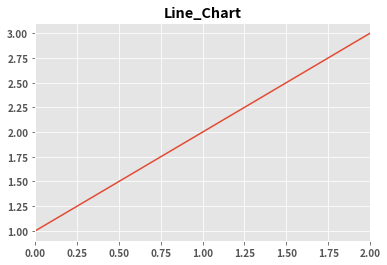

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# ggplot 스타일로 변경!
plt.style.use('ggplot')
ax = pd.Series([1,2,3]).plot()
ax.set_title("Line_Chart")
ax

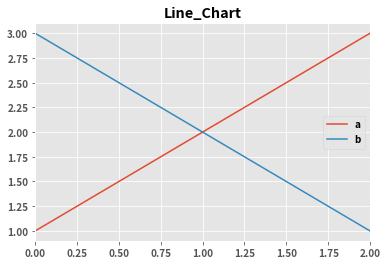

In [92]:
df = pd.DataFrame({'a':[1,2,3], 'b':[3,2,1]})
ax = df.plot()
ax.set_title('Line_Chart')
ax

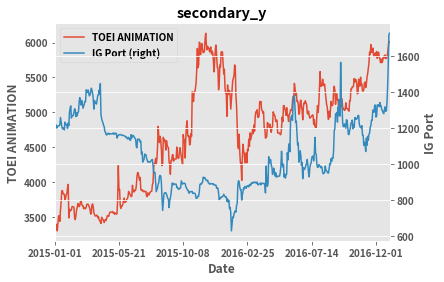

In [94]:
# y 축의 범위가 다를 경우.
anime_stock_price_df = pd.read_csv(anime_stock_price_csv, index_col=0)
ax = anime_stock_price_df.plot(secondary_y=['IG Port'])
ax.set_title('secondary_y')
ax.set_ylabel('TOEI ANIMATION')
ax.right_ax.set_ylabel('IG Port')
plt.show()

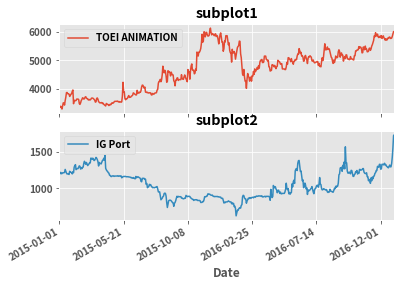

In [96]:
#subplot 사용
ax1, ax2 = anime_stock_price_df.plot(subplots=True)
ax1.set_title('subplot1')
ax2.set_title('subplot2')
plt.show()

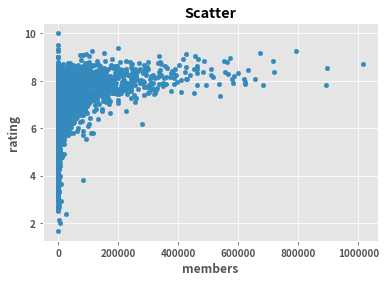

In [100]:
# 산포도 작성
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
anime_master_df = pd.read_csv(anime_master_csv)
ax = anime_master_df.plot.scatter(x='members', y='rating')
ax.set_title('Scatter')
plt.show()

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0


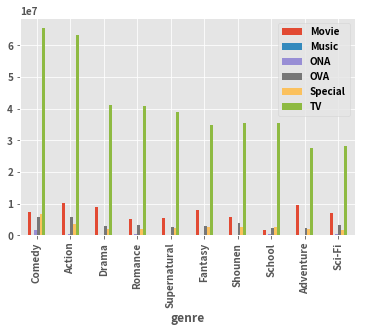

In [102]:
#막대그래프 작성
anime_genre_top10_pivoted_csv = os.path.join(base_url, 'anime_genre_top10_pivoted.csv')
anime_genre_top10_pivoted_df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col=0)
ax = anime_genre_top10_pivoted_df.plot.bar() 
anime_genre_top10_pivoted_df.head()

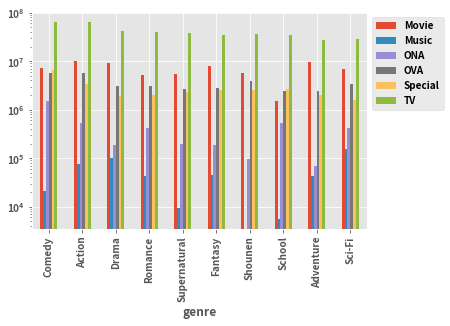

In [103]:
# y축을 로그로
ax = anime_genre_top10_pivoted_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(1, 1))

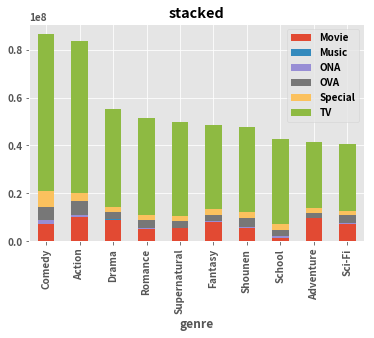

In [104]:
# 누적 막대 그래프
ax = anime_genre_top10_pivoted_df.plot.bar(stacked=True)
ax.set_title('stacked')

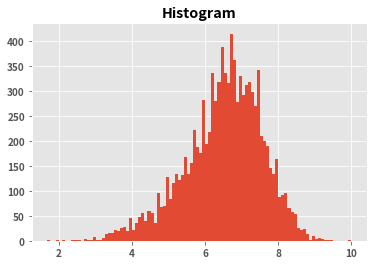

In [108]:
# 히스토그램 작성
# bins는 막대 갯수 설정
ax = anime_master_df['rating'].hist(bins=100)
ax.set_title('Histogram')

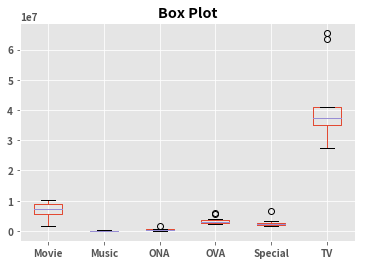

In [109]:
# 상자 수염 그래프
ax = anime_genre_top10_pivoted_df.plot.box()
ax.set_title('Box Plot')

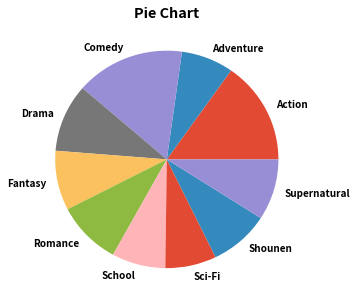

In [110]:
# 원 그래프 작성
anime_genre_top10_csv = os.path.join(base_url, 'anime_genre_top10.csv')
anime_genre_top10_df = pd.read_csv(anime_genre_top10_csv)
ax = anime_genre_top10_df.groupby('genre').sum()['members'].plot.pie(figsize=(5, 5))
ax.set_title('Pie Chart')
ax.set_ylabel('')